___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [2]:
import numpy as np
import pandas as pd
import nltk

from nltk.stem import WordNetLemmatizer

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [118]:
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [119]:
df.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [120]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [122]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,161
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,266
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,79
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,89


In [123]:
df.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
text lenght     int64
dtype: object

In [121]:
df['text lenght'] = (df['text'].str.split('[\W_]+'))
df['text lenght'] = df['text lenght'].str.len()

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

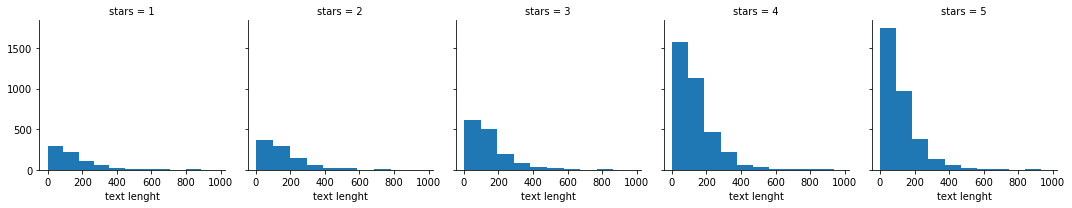

In [125]:
g = sns.FacetGrid(df, col="stars")
g.map(plt.hist,'text lenght')

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

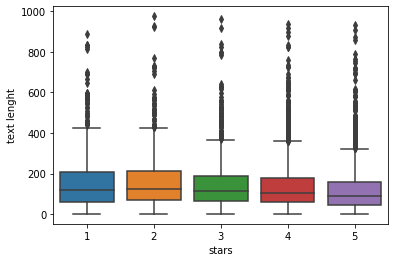

In [126]:
x = df['stars']
y = df['text lenght']

sns.boxplot(x,y, data =df)
plt.show()

**Create a boxplot of text length for each star category.**

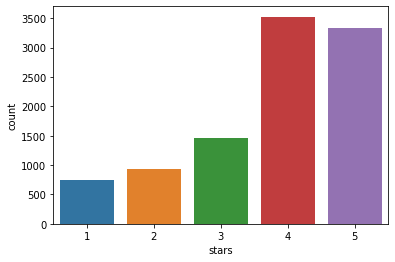

In [127]:
sns.countplot('stars', data = df)

**Create a countplot of the number of occurrences for each type of star rating.**

In [128]:
df1 = df.groupby('stars')['cool','useful','funny', 'text lenght'].mean()
df1

C:\Users\delchain_default\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,158.842457
2,0.719525,1.563107,0.875944,161.633225
3,0.788501,1.306639,0.694730,145.610541
4,0.954623,1.395916,0.670448,135.515315
5,0.944261,1.381780,0.608631,118.201678


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [129]:
df1.corr()

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.863061
useful,-0.743329,1.000000,0.894506,0.691441
funny,-0.944939,0.894506,1.000000,0.842810
text lenght,-0.863061,0.691441,0.842810,1.000000


**Use the corr() method on that groupby dataframe to produce this dataframe:**

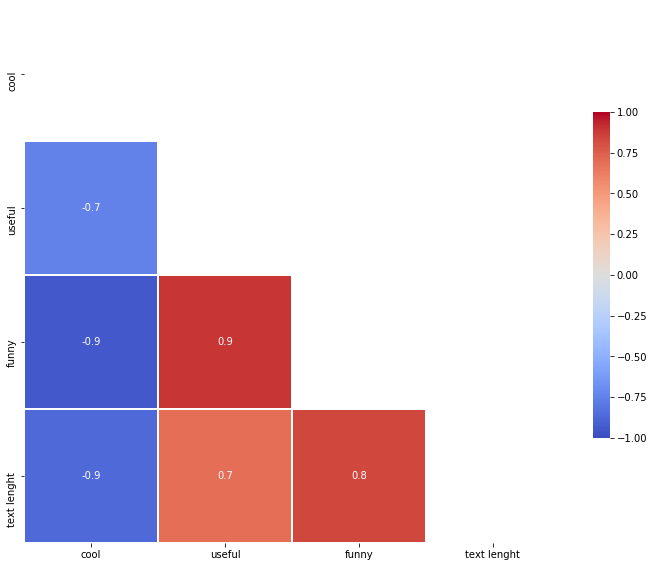

In [130]:

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(df1.corr())

sns.heatmap(df1.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [144]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)]
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,161
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,266
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,79
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,89
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,303
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,57
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,173
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,248
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,373


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [145]:
X = yelp_class['text']
y = yelp_class['stars']

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

**Import CountVectorizer and create a CountVectorizer object.**

In [147]:
cv = CountVectorizer()
X = cv.fit_transform(X)

VECTORIZATION:

Currently, we have the text as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those texts into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency) (can be done with CountVectoriser)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency) (can be done with TF-IDF - TfidfTransformer))

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm) (

FIT - TRANSFORM:

The fit_transform method applies to feature extraction objects such as CountVectorizer and TfidfTransformer. The "fit" part applies to the feature extractor itself: it determines what features it will base future transformations on. The "transform" part is what takes the data and returns some transformed data back at you.

For instance, let's say you have a CountVectorizer Object. Well, you call fit_transform for this object on some collection of strings. What it does is tokenize the strings and give you a vector for each string, each dimension of which corresponds to the number of times a token is found in the corresponding string. Most of the entries in all of the vectors will be zero, since only the entries which correspond to tokens found in that specific string will have positive values, but the vector is as long as the total number of tokens for the whole corpus.

So, fit_transform has both determined which tokens it will count, and how they correspond to entries in the count vector. It also gives you the count vectors for the training data.

From now on, you can just call transform() for that CountVectorizer object, and it will give you the counts of the tokens found in the training data that are also found in the new (test) data. This gives you data of the same shape to pass on to your classifier (after using a TfidfTransformer).

Similarly, the TfidfTransformer is fit to the document frequency for the training corpus and determines tfidf values for later data based on that.

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [148]:
from sklearn.model_selection import train_test_split

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [149]:
y_test.shape

(1226,)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [151]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

acc_nb_train = round(nb.score(X_train, y_train) * 100, 2)
print(acc_nb_train)

acc_nb_test = round(nb.score(X_test, y_test) * 100, 2)
print(acc_nb_test)



97.48
92.58


In [150]:
from sklearn.naive_bayes import MultinomialNB

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [152]:
from sklearn.metrics import confusion_matrix,classification_report

** Create a confusion matrix and classification report using these predictions and y_test **

In [153]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

Computes the (query, document) similarity. It has two parts.

1. **TF Score (Term Frequency)**\
   Considers documents as bag of words, agnostic to order of words. A document with 10 occurrences of the term is more relevant than a document with term frequency 1. But it is not 10 times more relevant, relevance is not proportional to frequency

2. **IDF Score (Inverse Document Frequency)**\
   We also want to use the frequency of the term in the collection for weighting and ranking. Rare terms are more informative than frequent terms. We want low positive weights for frequent terms and high weights for rare terms.

Combining these two we come up with a tf score and an idf score. We calculate these scores in the log-scale.

* The tf.idf score increases with number of occurrences within a document


* The tf.idf score increases with rarity of terms in the collection

TF-IDF is not a single method, but a class of techniques where similarity between queries and documents is measured via the sum of term frequency (TFs) multiplied by terms' importance. The term importance is frequently expressed via the IDF (inverse document frequency)\
\
 Typically, the more frequently the term occur in a document the larger is the TF coefficient. It is the reverse for the term importance coefficients, which are larger for terms that occur in fewer documents, i.e., more important. Thus, to compute TF\*IDF, you need to know the number of term occurrences. As I said, TF-IDF methods differ in details with respect to computing the TF and IDF part.

There are several probabilistic interpretations of the TF-IDF formula. My favorite one is that TF-IDF measures how surprising it is to see the query keywords in a document given a known distribution of these keywords in the text collection. I have a slightly more formal explanation of this theory in my blog: [TF-IDF is similar to a cross-entropy](http://searchivarius.org/blog/tf-idf-simply-cross-entropy "searchivarius.org").

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [159]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [160]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [161]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



PIPELINE

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. \
For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__'.\
\
Parameters\
steps :  List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.\
\
memory : None, str or object with the joblib.Memory interface, optional Used to cache the fitted transformers of the pipeline. By default, no caching is performed.\
\
verbose : bool, default=False If True, the time elapsed while fitting each step will be printed as it is completed.

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [162]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [163]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [164]:
predictions = pipeline.predict(X_test)

In [165]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\delchain_default\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

### Trying to replicate the 1st case (success)

In [166]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [167]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Great Job!

In [168]:
predictions = pipeline.predict(X_test)

In [169]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[155  73]
 [ 15 983]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

